# Estatística no futebol

### A duração de um técnico, no futebol, influencia na posição final do campeonato?



#### Descrição do problema

Uma posição _volátil_, no futebol (tanto no Brasil quanto fora), é a posição de técnico. Uma prática comum é substituir o treinador após alguns resultados negativos. Naturalmente, um time que não troca o técnico não é garantia de sucesso no campeonato. Assim, surge a dúvida: será que, **em geral**, times com técnicos mais longevos ficam em uma posição melhor na tabela, no fim do campeonato?

#### Dados

Para _atacar_ esse problema, será disponibilizado um arquivo json com todos os dados do Campeonato Brasileiro de 2019. Para ler um arquivo json, basta importar o módulo 'pandas' com o comando:  ```import pandas as pd```. Para ler um arquivo json, utilize o método:  
```dados = pd.read_json('nome_do_arquivo.json') ```

Para acessar os valores, basta olhar os nomes presentes nas linhas e colunas. Por exemplo: dados[2][1]. Vale lembrar que os 'índices' podem ser strings também.

#### Resultado esperado

Ao fim do projeto, deverá ter os dados da posição final do time e do tempo (em número de rodadas) que o técnico mais longevo ficou. Por exemplo, o técnico do 1º colocado ficou 32 rodadas, do 2º ficou 37, do 3º 29, assim por diante. Essas dados podem ser armazenados em uma estrutura de dados de sua escolha

Observação: Trabalho em grupo de, no mínimo, 5 pessoas e máximo, 8 pessoas.
Com esses dados, utilizar o código abaixo para fazer um gráfico simples (x é a posição final e y o tempo do técnico mais longevo):


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import (kelbow_visualizer,silhouette_visualizer)
from sklearn.preprocessing import scale

In [ ]:
def plot_campeonato(campeonato):
    '''
    docstring
    -param campeonato
    '''

    import pandas as pd

    df = pd.read_json(campeonato)


    time_home = []
    time_away = []
    goals_home = []
    goals_away = []
    status_home = []
    status_away = []
    coach_home = []
    coach_away = []
    dic_geral = {}

    linhas, colunas = df.shape

    for j in range(colunas):
        for i in range(linhas):
            partida = df[j + 1][i]
            for key in partida:
                if key == 'clubs':
                    time_home.append(partida[key]['home'])
                    time_away.append(partida[key]['away'])
                elif key == 'goals':
                    goals_home.append(int(partida[key]['home']))
                    goals_away.append(int(partida[key]['away']))
                    if partida[key]['home'] > partida[key]['away']:
                        status_home.append('V')
                        status_away.append('D')
                    elif partida[key]['home'] < partida[key]['away']:
                        status_home.append('D')
                        status_away.append('V')
                    else:
                        status_home.append('E')
                        status_away.append('E')
                elif key == 'coach':
                    coach_home.append(partida[key]['home'])
                    coach_away.append(partida[key]['away'])


    dic_geral.update({'Time home': time_home,
                    'Time away': time_away,
                    'Goals home': goals_home,
                    'Goals away': goals_away,
                    'Status home': status_home,
                    'Status away': status_away,
                    'Coach home': coach_home,
                    'Coach away': coach_away})


    df_test=pd.DataFrame(dic_geral)

    contagem_vitorias = {}
    contagem_empates = {}


    # Essa função irá pegar o status_alvo (Vitorias e Empates) dentro da lista de times da home e away.
    def contagem_status(status_alvo, lista_status_time, lista_times, dict_contagem_status):
      if lista_status_time[i] == status_alvo:
         time_escolhido = lista_times[i]
         if time_escolhido in dict_contagem_status:
             dict_contagem_status[time_escolhido] += 1
         else:
             dict_contagem_status[time_escolhido] = 1


    for i in range(len(time_home)):
         contagem_status('V', status_home, time_home, contagem_vitorias)
         contagem_status('V', status_away, time_away, contagem_vitorias)
         contagem_status('E', status_home, time_home, contagem_empates)
         contagem_status('E', status_away, time_away, contagem_empates)

    def gol_feito(var_home, var_away):
        contagem_scout = {}
        for i in range(len(var_home)):
            if var_home[i]:
                time = time_home[i]
                if time in contagem_scout:
                    contagem_scout[time] += var_home[i]
                else:
                    contagem_scout[time] = var_home[i]


        for i in range(len(var_away)):
            if var_away[i]:
                time = time_away[i]
                if time in contagem_scout:
                    contagem_scout[time] += var_away[i]
                else:
                    contagem_scout[time] = var_away[i]

        return(contagem_scout)


    def gol_sofrido(var_home, var_away):
        contagem_scout = {}
        for i in range(len(var_home)):
            if var_home[i]:
                time = time_away[i]
                if time in contagem_scout:
                    contagem_scout[time] += var_home[i]
                else:
                    contagem_scout[time] = var_home[i]


        for i in range(len(var_away)):
            if var_away[i]:
                time = time_home[i]
                if time in contagem_scout:
                    contagem_scout[time] += var_away[i]
                else:
                    contagem_scout[time] = var_away[i]

        return(contagem_scout)

    gols_feito=gol_feito(goals_home, goals_away)
    gols_sofrido=gol_sofrido(goals_home, goals_away)

    #saldo de gols Gol_feito - gol_sofrido

    saldo = gols_feito.copy()
    for chave, valor in gols_sofrido.items():
        if chave in saldo:
            saldo[chave] -= valor
        else:
            saldo[chave] = valor

    def treinador(var_home, var_away):
        contagem_scout = {}
        for i in range(len(var_home)):
            if var_home[i]:
                time = time_home[i]
                if time not in contagem_scout:
                    contagem_scout[time] = [var_home[i]]
                else:
                    contagem_scout[time].append(var_home[i])


        for i in range(len(var_away)):
            if var_away[i]:
                time = time_away[i]
                if time not in contagem_scout:
                    contagem_scout[time] = [var_away[i]]
                else:
                    contagem_scout[time].append(var_away[i])


        return(contagem_scout)

    treinadores = treinador(coach_home, coach_away)
    lista_freq = []
    freq = {}
    for value in treinadores.values():
        #print(value)
        lista_treinadores = value
        for treinador in lista_treinadores:
            freq.update({treinador:lista_treinadores.count(treinador)})
        lista_freq.append(freq)
        freq = {}

    dict_longev = {}
    for elemento, treinador in zip(lista_freq, treinadores):
        dict_longev.update({treinador:max(elemento.values())})

    contagem_final = {}

    for time, vitorias, in contagem_vitorias.items():
        empates = contagem_empates.get(time, 0)
        saldos= saldo.get(time,0)
        gols=gols_feito.get(time,0)

        contagem_final[time] = ([(3*vitorias) + empates,vitorias,saldos, gols ])

    ordem = sorted(contagem_final.items(), key=lambda x: x[1],reverse= True)

    times_ordenados = dict(ordem)

    times_ordenados

    long_ord = {}
    longev_plot = []
    for time in times_ordenados.keys():
        for time_long, longevidade in dict_longev.items():
            if time == time_long:
                long_ord.update({time:longevidade})
                longev_plot.append(longevidade)


    pos_plot = list(range(1,21))

    plt.figure(figsize=(18,12))
    plt.title('Campeonato Brasileiro 2019')
    legenda = []
    plt.scatter(pos_plot, longev_plot)
    #legenda.append(resultado[1] + " (" + resultado[2]["nome"] + ")")
    #plt.legend(legenda)
    plt.xlabel('Posição')
    plt.ylabel('Técnico mais longevo (rodadas)')
    plt.grid(True)
    plt.xscale('linear')
    return


In [ ]:
def feature_engineering(df:pd.DataFrame)->pd.DataFrame:
  
  df["classificacao"]=df.ponto_final.rank(method="first", ascending=False).astype("int")
  df["gol_sofrido"]=df['total_gol']-df["saldo_gol"]
  df["relacao_gols"]=df["total_gol"]/df["gol_sofrido"]
  df["gol_jogo"]=df["total_gol"]/38
  df["longev_rela"]=df["longevidade"]/38
  
  return df

#### Opção de resolução com Dicionários (Ane)

In [35]:
df = pd.read_json('/content/brasileirao-2019.json')

In [36]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,34,33,35,36,37,38
0,"{'clubs': {'home': 'São Paulo', 'away': 'Botaf...","{'clubs': {'home': 'Internacional', 'away': 'F...","{'clubs': {'home': 'Vasco da Gama', 'away': 'C...","{'clubs': {'home': 'Fluminense', 'away': 'Bota...","{'clubs': {'home': 'Fluminense', 'away': 'Cruz...","{'clubs': {'home': 'Botafogo', 'away': 'Palmei...","{'clubs': {'home': 'Flamengo', 'away': 'Fortal...","{'clubs': {'home': 'Vasco da Gama', 'away': 'I...","{'clubs': {'home': 'Botafogo', 'away': 'Grêmio...","{'clubs': {'home': 'Grêmio', 'away': 'Vasco da...",...,"{'clubs': {'home': 'Palmeiras', 'away': 'São P...","{'clubs': {'home': 'Fortaleza', 'away': 'Atlét...","{'clubs': {'home': 'Corinthians', 'away': 'For...","{'clubs': {'home': 'Goiás', 'away': 'Santos'},...","{'clubs': {'home': 'Flamengo', 'away': 'Vasco ...","{'clubs': {'home': 'Santos', 'away': 'São Paul...","{'clubs': {'home': 'Internacional', 'away': 'G...","{'clubs': {'home': 'Botafogo', 'away': 'Intern...","{'clubs': {'home': 'Athletico-PR', 'away': 'Sa...","{'clubs': {'home': 'Corinthians', 'away': 'Flu..."
1,"{'clubs': {'home': 'Atlético-MG', 'away': 'Ava...","{'clubs': {'home': 'CSA', 'away': 'Palmeiras'}...","{'clubs': {'home': 'Palmeiras', 'away': 'Inter...","{'clubs': {'home': 'Corinthians', 'away': 'Grê...","{'clubs': {'home': 'Palmeiras', 'away': 'Santo...","{'clubs': {'home': 'Grêmio', 'away': 'Atlético...","{'clubs': {'home': 'Bahia', 'away': 'Grêmio'},...","{'clubs': {'home': 'Palmeiras', 'away': 'Athle...","{'clubs': {'home': 'Fortaleza', 'away': 'Cruze...","{'clubs': {'home': 'Fortaleza', 'away': 'Avaí'...",...,"{'clubs': {'home': 'Avaí', 'away': 'Fortaleza'...","{'clubs': {'home': 'Fluminense', 'away': 'Vasc...","{'clubs': {'home': 'Atlético-MG', 'away': 'Goi...","{'clubs': {'home': 'Palmeiras', 'away': 'Corin...","{'clubs': {'home': 'Santos', 'away': 'Cruzeiro...","{'clubs': {'home': 'Fluminense', 'away': 'Atlé...","{'clubs': {'home': 'Chapecoense', 'away': 'Bot...","{'clubs': {'home': 'Ceará SC', 'away': 'Athlet...","{'clubs': {'home': 'Ceará SC', 'away': 'Corint...","{'clubs': {'home': 'Santos', 'away': 'Flamengo..."
2,"{'clubs': {'home': 'Chapecoense', 'away': 'Int...","{'clubs': {'home': 'Corinthians', 'away': 'Cha...","{'clubs': {'home': 'Ceará SC', 'away': 'Atléti...","{'clubs': {'home': 'Goiás', 'away': 'Ceará SC'...","{'clubs': {'home': 'Atlético-MG', 'away': 'Fla...","{'clubs': {'home': 'Flamengo', 'away': 'Athlet...","{'clubs': {'home': 'Botafogo', 'away': 'Vasco ...","{'clubs': {'home': 'Grêmio', 'away': 'Fortalez...","{'clubs': {'home': 'Internacional', 'away': 'B...","{'clubs': {'home': 'Bahia', 'away': 'Santos'},...",...,"{'clubs': {'home': 'Atlético-MG', 'away': 'Cha...","{'clubs': {'home': 'Palmeiras', 'away': 'Ceará...","{'clubs': {'home': 'Avaí', 'away': 'Santos'}, ...","{'clubs': {'home': 'Internacional', 'away': 'F...","{'clubs': {'home': 'Palmeiras', 'away': 'Grêmi...","{'clubs': {'home': 'Grêmio', 'away': 'Flamengo...","{'clubs': {'home': 'Bahia', 'away': 'Atlético-...","{'clubs': {'home': 'Avaí', 'away': 'Fluminense...","{'clubs': {'home': 'Atlético-MG', 'away': 'Bot...","{'clubs': {'home': 'Botafogo', 'away': 'Ceará ..."
3,"{'clubs': {'home': 'Flamengo', 'away': 'Cruzei...","{'clubs': {'home': 'Cruzeiro', 'away': 'Ceará ...","{'clubs': {'home': 'Chapecoense', 'away': 'Ath...","{'clubs': {'home': 'Flamengo', 'away': 'Chapec...","{'clubs': {'home': 'São Paulo', 'away': 'Bahia...","{'clubs': {'home': 'Santos', 'away': 'Internac...","{'clubs': {'home': 'Ceará SC', 'away': 'Santos...","{'clubs': {'home': 'Cruzeiro', 'away': 'Corint...","{'clubs': {'home': 'CSA', 'away': 'Flamengo'},...","{'clubs': {'home': 'São Paulo', 'away': 'Palme...",...,"{'clubs': {'home': 'Ceará SC', 'away': 'Flumin...","{'clubs': {'home': 'Chapecoense', 'away': 'São...","{'clubs': {'home': 'Athletico-PR', 'away': 'Cr...","{'clubs': {'home': 'Cruzeiro', 'away': 'Atléti...","{'clubs': {'home': 'Atlético-MG', 'away': 'Ath...","{'clubs': {'home': 

In [37]:
#Calculo de pontos, vitorias,empates,derrotas,saldo de gols,gols pro e gols contra de todas as partidas - resultado final por time

resultados = {}

for n_rodada in range(1,39):#colunas do df
  for n_partida in range(0,10): #linhas do df
    partida = df[n_rodada][n_partida] #percorrendo cada registro de coluna +  linha para o df todo
    time1 = partida["clubs"]["home"] #analisando cada jogo
    time2 = partida["clubs"]["away"]
    gols1 = int(partida["goals"]["home"]) #analisando cada gol, em cada jogo
    gols2 = int(partida["goals"]["away"])
    treinador1 = partida["coach"]["home"] #analisando cada treinador do time
    treinador2 = partida["coach"]["away"]

    # chave1 = time1
    resultado1 = resultados.get(time1) #usando o get para nao gerar erro caso nao encontre

    #chave = time2
    resultado2 = resultados.get(time2)




    if resultado1 == None: #senao existir no dicionario, insira o time como todas essas informações, o treinador será um dicionario contendo o nome dos treinadores e a quantidade de partidas
    #o max_treinador_rodadas é outro dicionario contendo o treinador mais longivo e seu nome
      resultado1 = resultados[time1] = {"time": time1,"P":0,"V":0,"E":0,"D":0,"GP":0,"GC":0,"SG":0,"treinadores":{},"max_treinador_rodadas":{"nome":"","rodadas":0}}

    if treinador1 not in resultado1["treinadores"]: #se o treinador nao estiver em treinadores, insira ele com o inicializador de rodadas, no caso 0
      resultado1["treinadores"][treinador1] = 0

    if resultado2 == None:
      resultado2 = resultados[time2] = {"time": time2,"P":0,"V":0,"E":0,"D":0,"GP":0,"GC":0,"SG":0,"treinadores":{},"max_treinador_rodadas":{"nome":"","rodadas":0}}

    if treinador2 not in resultado2["treinadores"]:
      resultado2["treinadores"][treinador2] = 0

    #comparação de quem venceu , perdeu ou empatou na partida.
    if gols1 > gols2: #ganhou time 1

      resultado1["P"] = resultado1["P"] + 3
      resultado1["V"] = resultado1["V"] + 1

      resultado2["D"] = resultado2["D"] + 1

    elif gols2 > gols1: #ganhou o time 2
      resultado1["D"] = resultado1["D"] + 1

      resultado2["P"] = resultado2["P"] + 3
      resultado2["V"] = resultado2["V"] + 1

    else:#EMPATE
      resultado1["P"] = resultado1["P"] + 1
      resultado1["E"] = resultado1["E"] + 1

      resultado2["P"] = resultado2["P"] + 1
      resultado2["E"] = resultado2["E"] + 1

    #atualizando os gols feitos, os gols tomados e o saldo de gols(diferença entre os 2 primeiros)
    resultado1["GP"] = resultado1["GP"] + gols1
    resultado1["GC"] = resultado1["GC"] + gols2
    resultado1["SG"] = resultado1["SG"] + gols1 - gols2

    resultado2["GP"] = resultado2["GP"] + gols2
    resultado2["GC"] = resultado2["GC"] + gols1
    resultado2["SG"] = resultado2["SG"] + gols2 - gols1

    #incrementado o número de rodadas que o treinador permaneceu em uma variavel- foi criada para ser reutilizada mais abaixo no codigo - facilitar o reuso
    treinador_rodadas1 = resultado1["treinadores"][treinador1] + 1
    treinador_rodadas2 = resultado2["treinadores"][treinador2] + 1

    #aqui será atualizado no dicionario
    resultado1["treinadores"][treinador1] = treinador_rodadas1
    resultado2["treinadores"][treinador2] = treinador_rodadas2


    #checa qual o maior tempo de rodadas de um treinador e insere nesse dicionario, isso vai sendo feito ao longo de todo df e a cada iteração de rodadas
    if treinador_rodadas1 > resultado1["max_treinador_rodadas"]["rodadas"]:
      resultado1["max_treinador_rodadas"]["rodadas"] = treinador_rodadas1
      resultado1["max_treinador_rodadas"]["nome"] = treinador1

    if treinador_rodadas2 > resultado2["max_treinador_rodadas"]["rodadas"]:
      resultado2["max_treinador_rodadas"]["rodadas"] = treinador_rodadas2
      resultado2["max_treinador_rodadas"]["nome"] = treinador2


    #print(time1,time1_goals,"X",time2_goals,time2)
print(resultados.values()) #retorna os valores do dicionario

dict_values([{'time': 'São Paulo', 'P': 63, 'V': 17, 'E': 12, 'D': 9, 'GP': 39, 'GC': 30, 'SG': 9, 'treinadores': {'A. Stival': 21, 'F. Diniz Silva': 16, 'M. Longo de Araújo': 1}, 'max_treinador_rodadas': {'nome': 'A. Stival', 'rodadas': 21}}, {'time': 'Botafogo', 'P': 43, 'V': 13, 'E': 4, 'D': 21, 'GP': 31, 'GC': 45, 'SG': -14, 'treinadores': {'E. de Souza Barroca': 23, 'B. Lazaroni': 2, 'A. Valentim do Carmo Neto': 13}, 'max_treinador_rodadas': {'nome': 'E. de Souza Barroca', 'rodadas': 23}}, {'time': 'Atlético-MG', 'P': 48, 'V': 13, 'E': 9, 'D': 16, 'GP': 45, 'GC': 49, 'SG': -4, 'treinadores': {'R. Marques Santana': 25, 'V. Carmo Mancini': 13}, 'max_treinador_rodadas': {'nome': 'R. Marques Santana', 'rodadas': 25}}, {'time': 'Avaí', 'P': 20, 'V': 3, 'E': 11, 'D': 24, 'GP': 18, 'GC': 62, 'SG': -44, 'treinadores': {'E. Machado Souto': 9, 'A. Valentim do Carmo Neto': 15, 'E. Spinassé Camillato': 14}, 'max_treinador_rodadas': {'nome': 'A. Valentim do Carmo Neto', 'rodadas': 15}}, {'time

In [38]:
#transoforma em uma lista de dicionarios pra ordernar por pontuação, mas aqui usa os outros criterios pois tem um exemplo do Bahia e Vasco da Gama que a pontuaçãp é igual,
#nº de vitorias é ,empate tbm, oq alterou foi o saldo de gols que classificou um e nao outro.
#o lambda é usado no lugar de uma função definida por def.

for index, time in enumerate(sorted(list(resultados.values()), reverse = True,
  key = lambda resultado: (resultado["P"], resultado["V"], resultado["GP"], resultado["SG"]))):
  print(index + 1, time, time["max_treinador_rodadas"])
  #como a colocação começa em 1, o indice foi somado a 1,depois o dicionario com os dados do timem e treinador com maior numero de rodadas.

analises = [
    (index + 1, time["time"], time["max_treinador_rodadas"])
    #colocação iniciando em 1, o nome do time, e o treinador com maior numero de rodadas.
    #daqui pra baixo é o mesmo codigo que está encima , lá foi usado só pra testar.
    #ordem de execução: list,sorted,enumerate (pois no for precida do indice e do valor), e por fim cria a tupla, que está dentro de uma lista.
    for index, time in
      enumerate(
          sorted(
                 list(resultados.values()),
                 reverse = True,
                 key = lambda resultado: (resultado["P"], resultado["V"], resultado["GP"], resultado["SG"])
          )
      )
]
#compreensão de listas criando uma lista nova, e comparando as chaves pra ordernar a colocação dos times

print(analises) #aqui retorna uma lista de tuplas contendo a colocação , o nome do time, e um dicionario com o nome do técnico e a quantidade de rodadas que permaneceu.

1 {'time': 'Flamengo', 'P': 90, 'V': 28, 'E': 6, 'D': 4, 'GP': 86, 'GC': 37, 'SG': 49, 'treinadores': {'A. da Silva Braga': 6, 'M. Salles': 3, 'J. Pinheiro de Jesus': 28, 'J. Pires de Deus': 1}, 'max_treinador_rodadas': {'nome': 'J. Pinheiro de Jesus', 'rodadas': 28}} {'nome': 'J. Pinheiro de Jesus', 'rodadas': 28}
2 {'time': 'Santos', 'P': 74, 'V': 22, 'E': 8, 'D': 8, 'GP': 60, 'GC': 33, 'SG': 27, 'treinadores': {'J. Sampaoli Moya': 38}, 'max_treinador_rodadas': {'nome': 'J. Sampaoli Moya', 'rodadas': 38}} {'nome': 'J. Sampaoli Moya', 'rodadas': 38}
3 {'time': 'Palmeiras', 'P': 74, 'V': 21, 'E': 11, 'D': 6, 'GP': 61, 'GC': 32, 'SG': 29, 'treinadores': {'L. Scolari': 16, 'L. Venker de Menezes': 20, 'A. Lopes dos Santos': 2}, 'max_treinador_rodadas': {'nome': 'L. Venker de Menezes', 'rodadas': 20}} {'nome': 'L. Venker de Menezes', 'rodadas': 20}
4 {'time': 'Grêmio', 'P': 65, 'V': 19, 'E': 8, 'D': 11, 'GP': 64, 'GC': 39, 'SG': 25, 'treinadores': {'Renato Gaúcho': 38}, 'max_treinador_roda

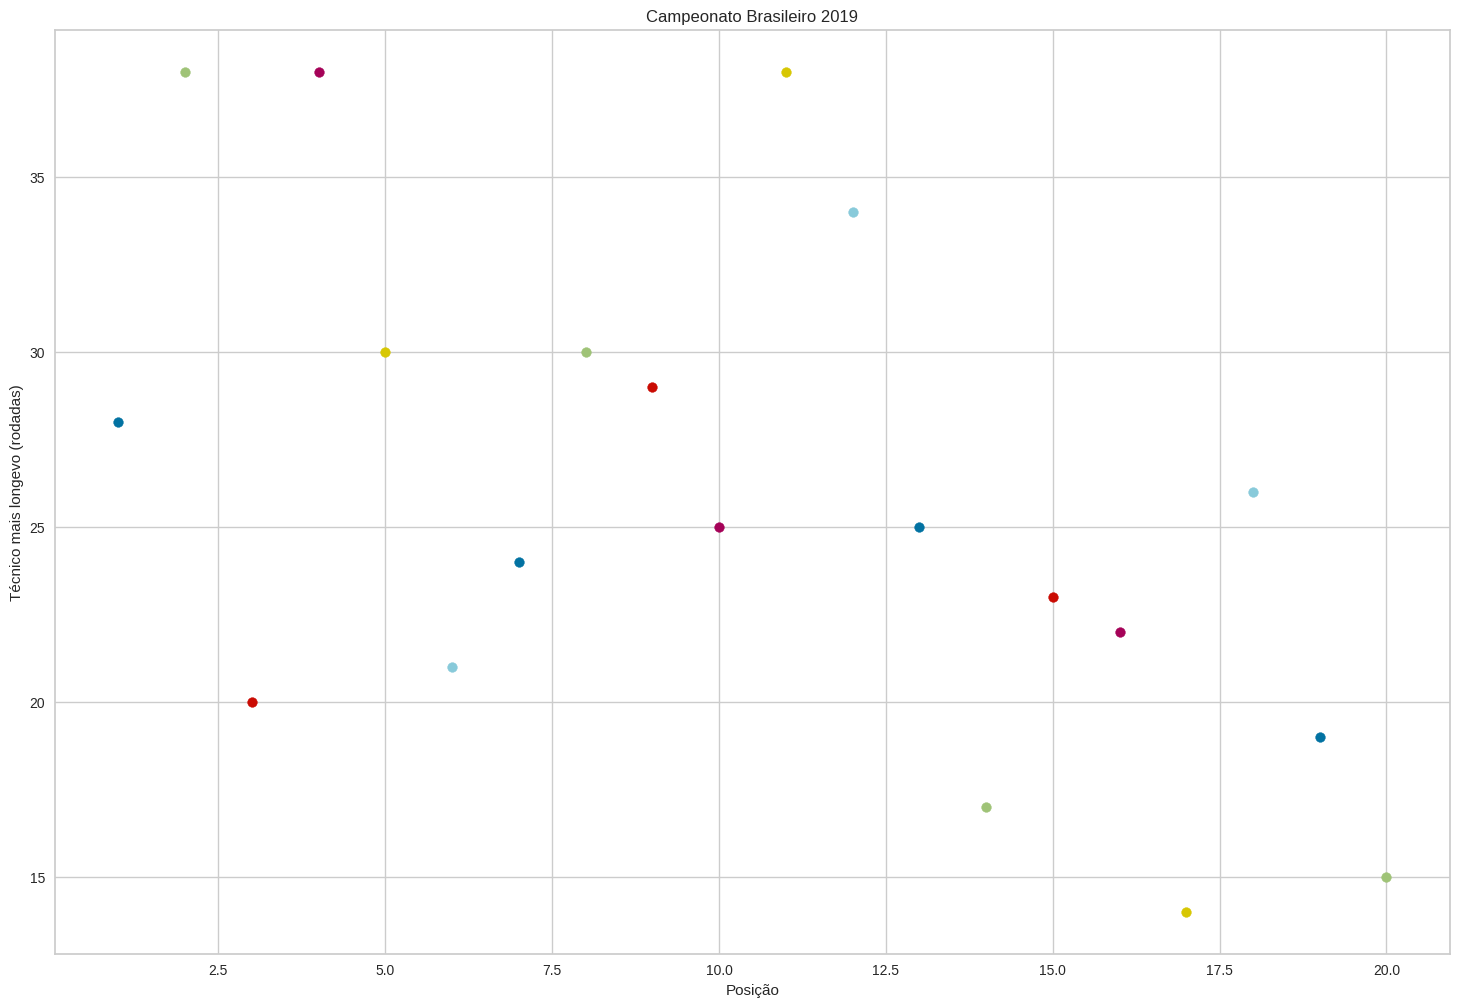

In [39]:
plt.figure(figsize=(18,12))
plt.title('Campeonato Brasileiro 2019')
legenda = []
for resultado in analises:#forma pra percorrer a a lista analise que contem as tuplas e plotar as bolinhas no grafico
  plt.scatter(resultado[0],resultado[2]["rodadas"])
  legenda.append(resultado[1] + " (" + resultado[2]["nome"] + ")")
#plt.legend(legenda)
plt.xlabel('Posição')
plt.ylabel('Técnico mais longevo (rodadas)')
plt.grid(True)
plt.xscale('linear')

## Opção de resolução com Listas
###Criando Listas a Partir do df


In [40]:

import pandas as pd

df = pd.read_json('/content/brasileirao-2019.json')


time_home = []
time_away = []
goals_home = []
goals_away = []
status_home = []
status_away = []
coach_home = []
coach_away = []
dic_geral = {}

linhas, colunas = df.shape

for j in range(colunas):
  for i in range(linhas):
    partida = df[j + 1][i]
    for key in partida:
      if key == 'clubs':
        time_home.append(partida[key]['home'])
        time_away.append(partida[key]['away'])
      elif key == 'goals':
        goals_home.append(int(partida[key]['home']))
        goals_away.append(int(partida[key]['away']))
        if partida[key]['home'] > partida[key]['away']:
          status_home.append('V')
          status_away.append('D')
        elif partida[key]['home'] < partida[key]['away']:
          status_home.append('D')
          status_away.append('V')
        else:
          status_home.append('E')
          status_away.append('E')
      elif key == 'coach':
        coach_home.append(partida[key]['home'])
        coach_away.append(partida[key]['away'])


dic_geral.update({'Time home': time_home,
                  'Time away': time_away,
                  'Goals home': goals_home,
                  'Goals away': goals_away,
                  'Status home': status_home,
                  'Status away': status_away,
                  'Coach home': coach_home,
                  'Coach away': coach_away})


df_test=pd.DataFrame(dic_geral)

## Contagem de vitórias e empates por time

In [41]:
contagem_vitorias = {}
contagem_empates = {}

# Essa função irá pegar o status_alvo (Vitorias e Empates) dentro da lista de times da home e away.
def contagem_status(status_alvo, lista_status_time, lista_times, dict_contagem_status):
    if lista_status_time[i] == status_alvo:
            time_escolhido = lista_times[i]
            if time_escolhido in dict_contagem_status:
                dict_contagem_status[time_escolhido] += 1
            else:
                dict_contagem_status[time_escolhido] = 1


for i in range(len(time_home)):
     contagem_status('V', status_home, time_home, contagem_vitorias)
     contagem_status('V', status_away, time_away, contagem_vitorias)
     contagem_status('E', status_home, time_home, contagem_empates)
     contagem_status('E', status_away, time_away, contagem_empates)

## Gols Feitos, Gols sofridos, Saldo de Gols e treinadores

In [42]:
def gol_feito(var_home, var_away):
    contagem_scout = {}
    for i in range(len(var_home)):
        if var_home[i]:
            time = time_home[i]
            if time in contagem_scout:
                contagem_scout[time] += var_home[i]
            else:
                contagem_scout[time] = var_home[i]


    for i in range(len(var_away)):
        if var_away[i]:
            time = time_away[i]
            if time in contagem_scout:
                contagem_scout[time] += var_away[i]
            else:
                contagem_scout[time] = var_away[i]

    return(contagem_scout)


def gol_sofrido(var_home, var_away):
    contagem_scout = {}
    for i in range(len(var_home)):
        if var_home[i]:
            time = time_away[i]
            if time in contagem_scout:
                contagem_scout[time] += var_home[i]
            else:
                contagem_scout[time] = var_home[i]


    for i in range(len(var_away)):
        if var_away[i]:
            time = time_home[i]
            if time in contagem_scout:
                contagem_scout[time] += var_away[i]
            else:
                contagem_scout[time] = var_away[i]

    return(contagem_scout)

gols_feito=gol_feito(goals_home, goals_away)
gols_sofrido=gol_sofrido(goals_home, goals_away)

#saldo de gols Gol_feito - gol_sofrido

saldo = gols_feito.copy()
for chave, valor in gols_sofrido.items():
      if chave in saldo:
          saldo[chave] -= valor
      else:
          saldo[chave] = valor

def treinador(var_home, var_away):
    contagem_scout = {}
    for i in range(len(var_home)):
        if var_home[i]:
            time = time_home[i]
            if time not in contagem_scout:
                contagem_scout[time] = [var_home[i]]
            else:
                contagem_scout[time].append(var_home[i])


    for i in range(len(var_away)):
        if var_away[i]:
            time = time_away[i]
            if time not in contagem_scout:
                contagem_scout[time] = [var_away[i]]
            else:
                contagem_scout[time].append(var_away[i])


    return(contagem_scout)

treinadores = treinador(coach_home, coach_away)
lista_freq = []
freq = {}
for value in treinadores.values():
    #print(value)
    lista_treinadores = value
    for treinador in lista_treinadores:
        freq.update({treinador:lista_treinadores.count(treinador)})
    lista_freq.append(freq)
    freq = {}

dict_longev = {}
for elemento, treinador in zip(lista_freq, treinadores):
   dict_longev.update({treinador:max(elemento.values())})


## Gerando a classificação e as listas para plot

In [43]:

contagem_final = {}

for time, vitorias, in contagem_vitorias.items():
    empates = contagem_empates.get(time, 0)
    saldos= saldo.get(time,0)
    gols=gols_feito.get(time,0)

    contagem_final[time] = ([(3*vitorias) + empates,vitorias,saldos, gols ])

ordem = sorted(contagem_final.items(), key=lambda x: x[1],reverse= True)

times_ordenados = dict(ordem)

times_ordenados

long_ord = {}
longev_plot = []
for time in times_ordenados.keys():
    for time_long, longevidade in dict_longev.items():
        if time == time_long:
            long_ord.update({time:longevidade})
            longev_plot.append(longevidade)


pos_plot = list(range(1,21))


## Plot Final

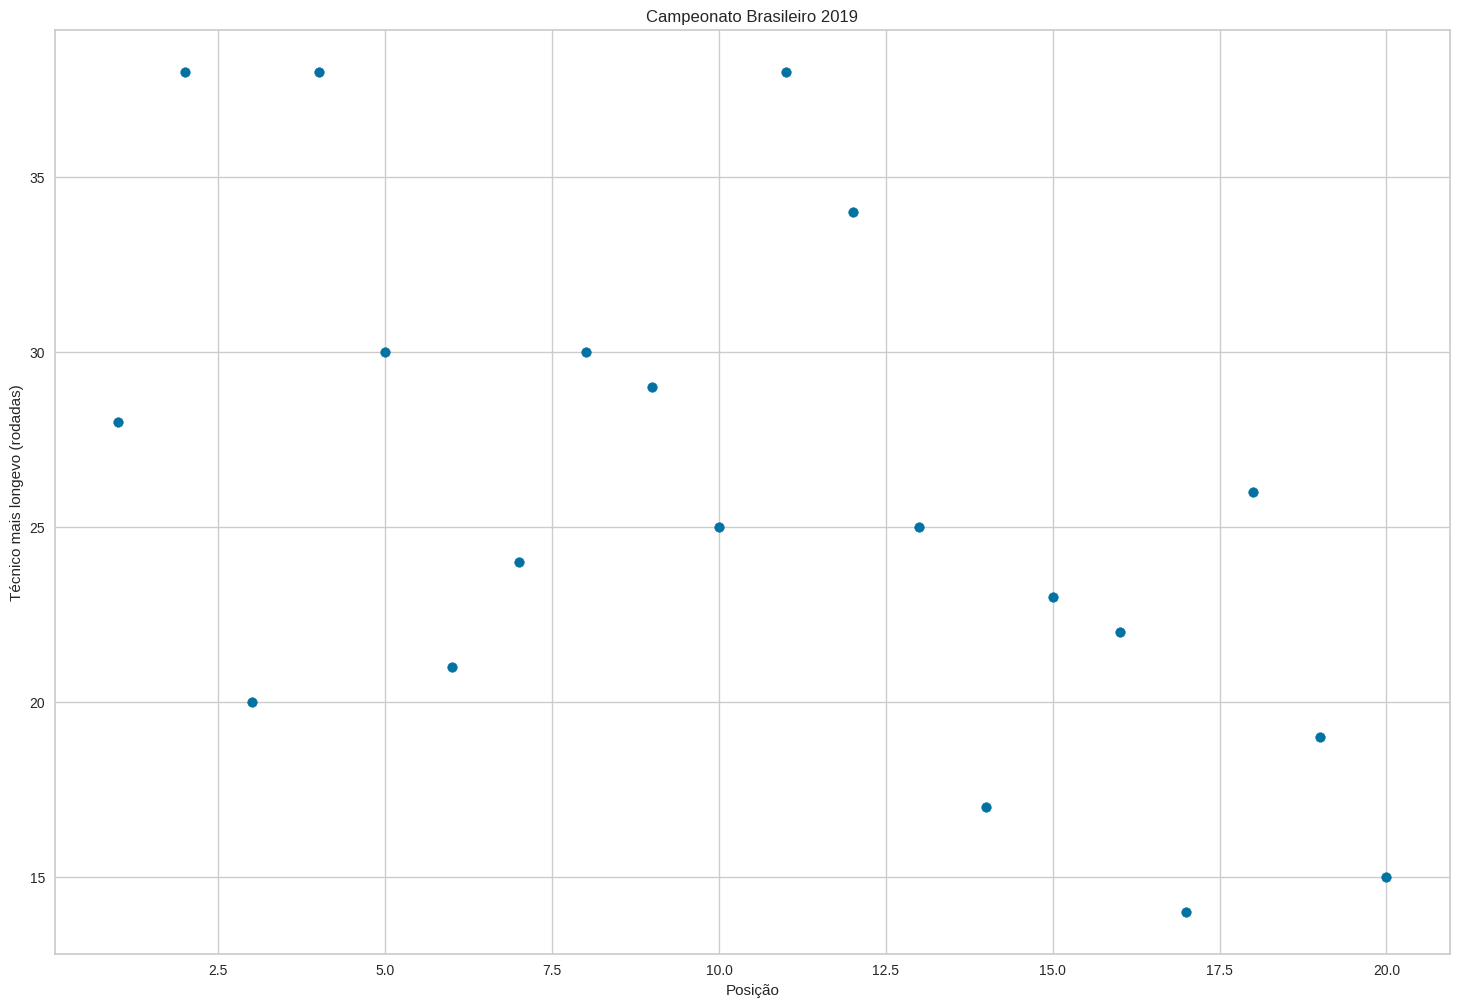

In [44]:
plt.figure(figsize=(18,12))
plt.title('Campeonato Brasileiro 2019')
legenda = []
plt.scatter(pos_plot, longev_plot)
  #legenda.append(resultado[1] + " (" + resultado[2]["nome"] + ")")
#plt.legend(legenda)
plt.xlabel('Posição')
plt.ylabel('Técnico mais longevo (rodadas)')
plt.grid(True)
plt.xscale('linear')

## Todo código em uma célula Versão Geral

In [45]:
def plot_campeonato(campeonato):
    '''
    docstring
    -param campeonato
    '''

    import pandas as pd

    df = pd.read_json(campeonato)


    time_home = []
    time_away = []
    goals_home = []
    goals_away = []
    status_home = []
    status_away = []
    coach_home = []
    coach_away = []
    dic_geral = {}

    linhas, colunas = df.shape

    for j in range(colunas):
        for i in range(linhas):
            partida = df[j + 1][i]
            for key in partida:
                if key == 'clubs':
                    time_home.append(partida[key]['home'])
                    time_away.append(partida[key]['away'])
                elif key == 'goals':
                    goals_home.append(int(partida[key]['home']))
                    goals_away.append(int(partida[key]['away']))
                    if partida[key]['home'] > partida[key]['away']:
                        status_home.append('V')
                        status_away.append('D')
                    elif partida[key]['home'] < partida[key]['away']:
                        status_home.append('D')
                        status_away.append('V')
                    else:
                        status_home.append('E')
                        status_away.append('E')
                elif key == 'coach':
                    coach_home.append(partida[key]['home'])
                    coach_away.append(partida[key]['away'])


    dic_geral.update({'Time home': time_home,
                    'Time away': time_away,
                    'Goals home': goals_home,
                    'Goals away': goals_away,
                    'Status home': status_home,
                    'Status away': status_away,
                    'Coach home': coach_home,
                    'Coach away': coach_away})


    df_test=pd.DataFrame(dic_geral)

    contagem_vitorias = {}
    contagem_empates = {}


    # Essa função irá pegar o status_alvo (Vitorias e Empates) dentro da lista de times da home e away.
    def contagem_status(status_alvo, lista_status_time, lista_times, dict_contagem_status):
      if lista_status_time[i] == status_alvo:
         time_escolhido = lista_times[i]
         if time_escolhido in dict_contagem_status:
             dict_contagem_status[time_escolhido] += 1
         else:
             dict_contagem_status[time_escolhido] = 1


    for i in range(len(time_home)):
         contagem_status('V', status_home, time_home, contagem_vitorias)
         contagem_status('V', status_away, time_away, contagem_vitorias)
         contagem_status('E', status_home, time_home, contagem_empates)
         contagem_status('E', status_away, time_away, contagem_empates)

    def gol_feito(var_home, var_away):
        contagem_scout = {}
        for i in range(len(var_home)):
            if var_home[i]:
                time = time_home[i]
                if time in contagem_scout:
                    contagem_scout[time] += var_home[i]
                else:
                    contagem_scout[time] = var_home[i]


        for i in range(len(var_away)):
            if var_away[i]:
                time = time_away[i]
                if time in contagem_scout:
                    contagem_scout[time] += var_away[i]
                else:
                    contagem_scout[time] = var_away[i]

        return(contagem_scout)


    def gol_sofrido(var_home, var_away):
        contagem_scout = {}
        for i in range(len(var_home)):
            if var_home[i]:
                time = time_away[i]
                if time in contagem_scout:
                    contagem_scout[time] += var_home[i]
                else:
                    contagem_scout[time] = var_home[i]


        for i in range(len(var_away)):
            if var_away[i]:
                time = time_home[i]
                if time in contagem_scout:
                    contagem_scout[time] += var_away[i]
                else:
                    contagem_scout[time] = var_away[i]

        return(contagem_scout)

    gols_feito=gol_feito(goals_home, goals_away)
    gols_sofrido=gol_sofrido(goals_home, goals_away)

    #saldo de gols Gol_feito - gol_sofrido

    saldo = gols_feito.copy()
    for chave, valor in gols_sofrido.items():
        if chave in saldo:
            saldo[chave] -= valor
        else:
            saldo[chave] = valor

    def treinador(var_home, var_away):
        contagem_scout = {}
        for i in range(len(var_home)):
            if var_home[i]:
                time = time_home[i]
                if time not in contagem_scout:
                    contagem_scout[time] = [var_home[i]]
                else:
                    contagem_scout[time].append(var_home[i])


        for i in range(len(var_away)):
            if var_away[i]:
                time = time_away[i]
                if time not in contagem_scout:
                    contagem_scout[time] = [var_away[i]]
                else:
                    contagem_scout[time].append(var_away[i])


        return(contagem_scout)

    treinadores = treinador(coach_home, coach_away)
    lista_freq = []
    freq = {}
    for value in treinadores.values():
        #print(value)
        lista_treinadores = value
        for treinador in lista_treinadores:
            freq.update({treinador:lista_treinadores.count(treinador)})
        lista_freq.append(freq)
        freq = {}

    dict_longev = {}
    for elemento, treinador in zip(lista_freq, treinadores):
        dict_longev.update({treinador:max(elemento.values())})

    contagem_final = {}

    for time, vitorias, in contagem_vitorias.items():
        empates = contagem_empates.get(time, 0)
        saldos= saldo.get(time,0)
        gols=gols_feito.get(time,0)

        contagem_final[time] = ([(3*vitorias) + empates,vitorias,saldos, gols ])

    ordem = sorted(contagem_final.items(), key=lambda x: x[1],reverse= True)

    times_ordenados = dict(ordem)

    times_ordenados

    long_ord = {}
    longev_plot = []
    for time in times_ordenados.keys():
        for time_long, longevidade in dict_longev.items():
            if time == time_long:
                long_ord.update({time:longevidade})
                longev_plot.append(longevidade)


    pos_plot = list(range(1,21))

    plt.figure(figsize=(18,12))
    plt.title('Campeonato Brasileiro 2019')
    legenda = []
    plt.scatter(pos_plot, longev_plot)
    #legenda.append(resultado[1] + " (" + resultado[2]["nome"] + ")")
    #plt.legend(legenda)
    plt.xlabel('Posição')
    plt.ylabel('Técnico mais longevo (rodadas)')
    plt.grid(True)
    plt.xscale('linear')
    return


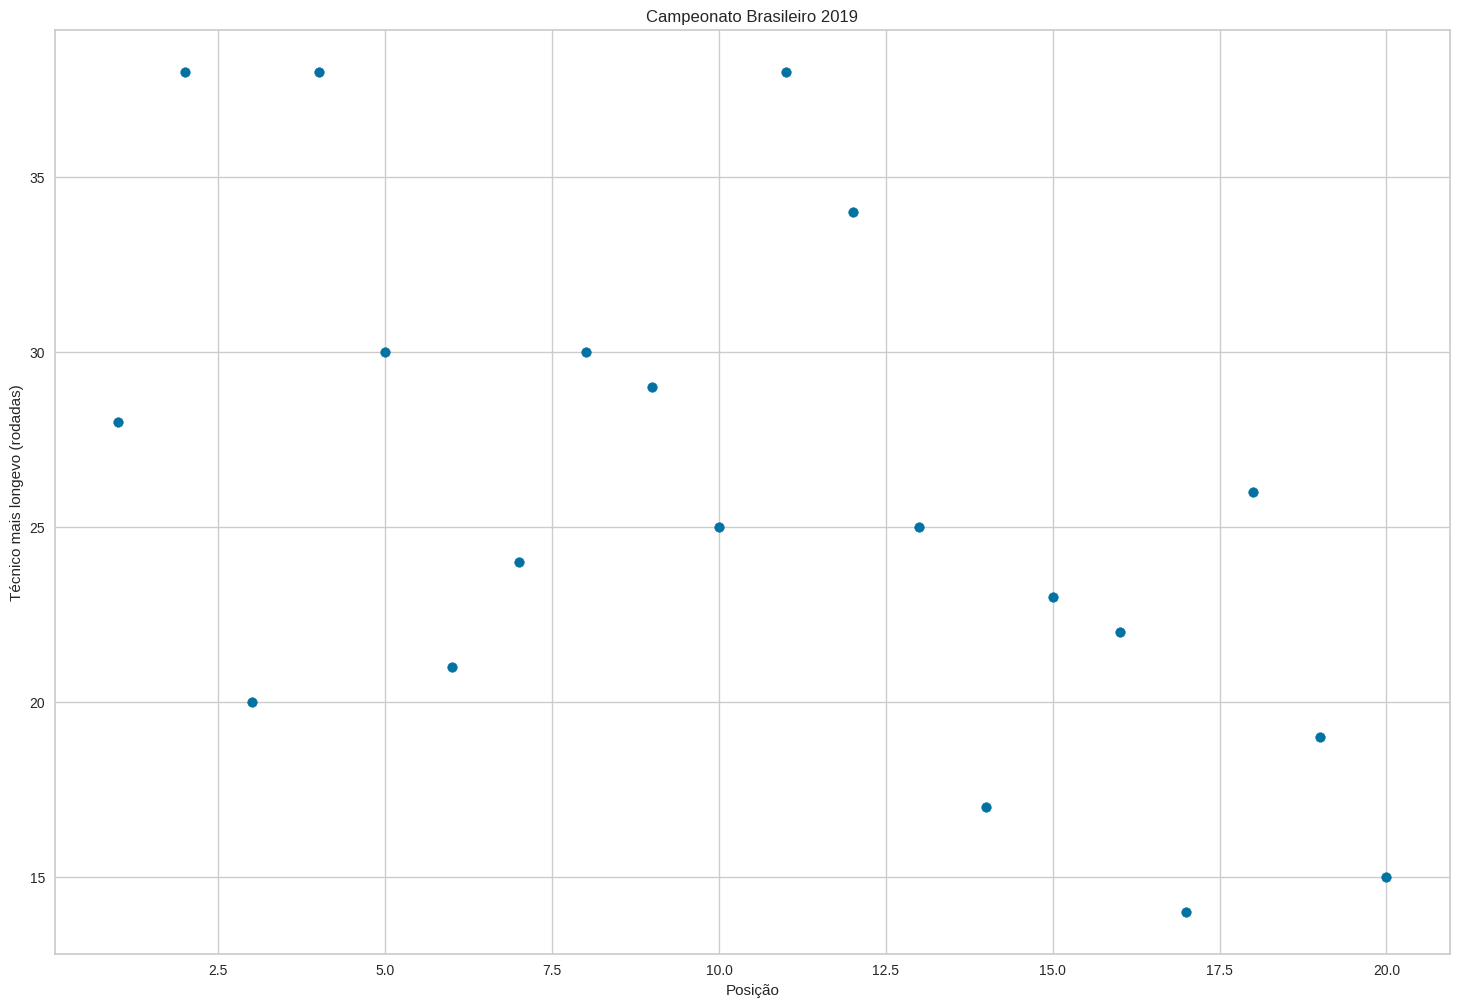

In [46]:
plot_campeonato('/Users/chenyenpin/Documents/ADA-Pr1/dados/brasileirao-2019.json')

In [47]:
logevidade=pd.DataFrame(longev_plot)

In [48]:
logevidade

,0
0,28
1,38
2,20
3,38
4,30
5,21
6,24
7,30
8,29
9,25


In [49]:
df_class=pd.DataFrame(times_ordenados).T

In [50]:
df_class=df_class.reset_index()

In [51]:
df_final=pd.concat([df_class, logevidade], axis=1 )
df_final.columns=[
    "time",
    "ponto_final",
    "vitorias",
    "saldo_gol",
    "total_gol",
    "longevidade"
    ]

In [52]:
def feature_engineering(df:pd.DataFrame)->pd.DataFrame:
  
  df["classificacao"]=df.ponto_final.rank(method="first", ascending=False).astype("int")
  df["gol_sofrido"]=df['total_gol']-df["saldo_gol"]
  df["relacao_gols"]=df["total_gol"]/df["gol_sofrido"]
  df["gol_jogo"]=df["total_gol"]/38
  df["longev_rela"]=df["longevidade"]/38
  
  return df



In [53]:

df_final=feature_engineering(df_final)
df_final

,time,ponto_final,vitorias,saldo_gol,total_gol,longevidade,gol_sofrido,relacao_gols,gol_jogo,longev_rela,classificacao
0,Flamengo,90,28,49,86,28,37,2.324324,2.263158,0.736842,1
1,Santos,74,22,27,60,38,33,1.818182,1.578947,1.000000,2
2,Palmeiras,74,21,29,61,20,32,1.906250,1.605263,0.526316,3
3,Grêmio,65,19,25,64,38,39,1.641026,1.684211,1.000000,4
4,Athletico-PR,64,18,19,51,30,32,1.593750,1.342105,0.789474,5
5,São Paulo,63,17,9,39,21,30,1.300000,1.026316,0.552632,6
6,Internacional,57,16,5,44,24,39,1.128205,1.157895,0.631579,7
7,Corinthians,56,14,8,42,30,34,1.235294,1.105263,0.789474,8
8,Fortaleza,53,15,1,50,29,49,1.020408,1.315789,0.763158,9
9,Goiás,52,15,-18,46,25,64,0.718750,1.210526,0.657895,10


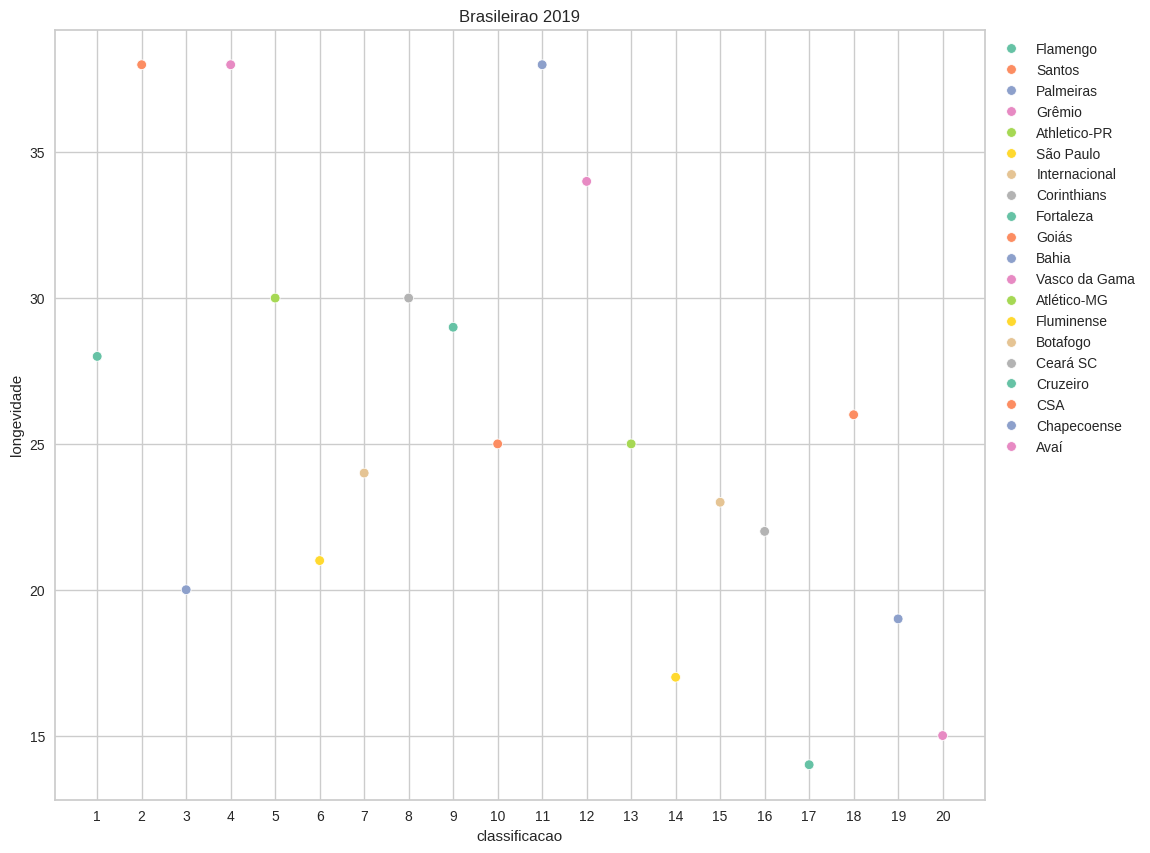

In [54]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_final, x="classificacao", y="longevidade", palette="Set2", hue="time",)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(list(range(1,max(df_final["classificacao"])+1)),[str(i) for i in range(1,max(df_final["classificacao"])+1)])
plt.title("Brasileirao 2019")
plt.show()


In [55]:
df_final=feature_engineering(df_final)
df_final

,time,ponto_final,vitorias,saldo_gol,total_gol,longevidade,gol_sofrido,relacao_gols,gol_jogo,longev_rela,classificacao
0,Flamengo,90,28,49,86,28,37,2.324324,2.263158,0.736842,1
1,Santos,74,22,27,60,38,33,1.818182,1.578947,1.000000,2
2,Palmeiras,74,21,29,61,20,32,1.906250,1.605263,0.526316,3
3,Grêmio,65,19,25,64,38,39,1.641026,1.684211,1.000000,4
4,Athletico-PR,64,18,19,51,30,32,1.593750,1.342105,0.789474,5
5,São Paulo,63,17,9,39,21,30,1.300000,1.026316,0.552632,6
6,Internacional,57,16,5,44,24,39,1.128205,1.157895,0.631579,7
7,Corinthians,56,14,8,42,30,34,1.235294,1.105263,0.789474,8
8,Fortaleza,53,15,1,50,29,49,1.020408,1.315789,0.763158,9
9,Goiás,52,15,-18,46,25,64,0.718750,1.210526,0.657895,10


In [56]:
corr=df_final.corr()
corr

<ipython-input-56-8958c98e06f6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_final.corr()


,ponto_final,vitorias,saldo_gol,total_gol,longevidade,gol_sofrido,relacao_gols,gol_jogo,longev_rela,classificacao
ponto_final,1.000000,0.988213,0.962281,0.935497,0.483741,-0.716262,0.964921,0.935497,0.483741,-0.970028
vitorias,0.988213,1.000000,0.939997,0.942022,0.481523,-0.655046,0.945587,0.942022,0.481523,-0.950778
saldo_gol,0.962281,0.939997,1.000000,0.929518,0.501910,-0.811858,0.984106,0.929518,0.501910,-0.930769
total_gol,0.935497,0.942022,0.929518,1.000000,0.520959,-0.539324,0.930901,1.000000,0.520959,-0.886634
longevidade,0.483741,0.481523,0.501910,0.520959,1.000000,-0.321315,0.466205,0.520959,1.000000,-0.549310
gol_sofrido,-0.716262,-0.655046,-0.811858,-0.539324,-0.321315,1.000000,-0.773374,-0.539324,-0.321315,0.721663
relacao_gols,0.964921,0.945587,0.984106,0.930901,0.466205,-0.773374,1.000000,0.930901,0.466205,-0.937231
gol_jogo,0.935497,0.942022,0.929518,1.000000,0.520959,-0.539324,0.930901,1.000000,0.520959,-0.886634
longev_rela,0.483741,0.481523,0.501910,0.520959,1.000000,-0.321315,0.466205,0.520959,1.000000,-0.549310
classificacao,-0.970028,-0.950778,-0.930769,-0.886634,-0.549310,0.721663,-0.937231,-0.886634,-0.549310,1.000000


<Axes: >

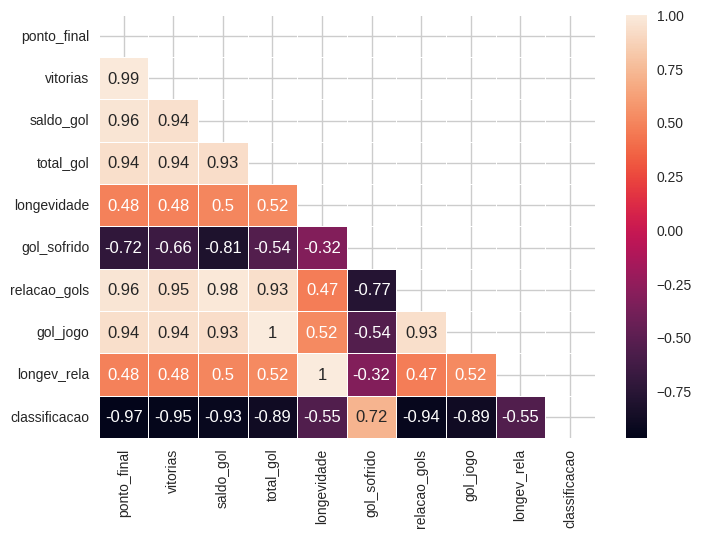

In [57]:
mask=np.triu(np.ones_like(corr))

sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, )

In [58]:
cat_col=df_final.select_dtypes(exclude="number").columns.tolist()
num_col=[col for col in df_final if col not in cat_col]

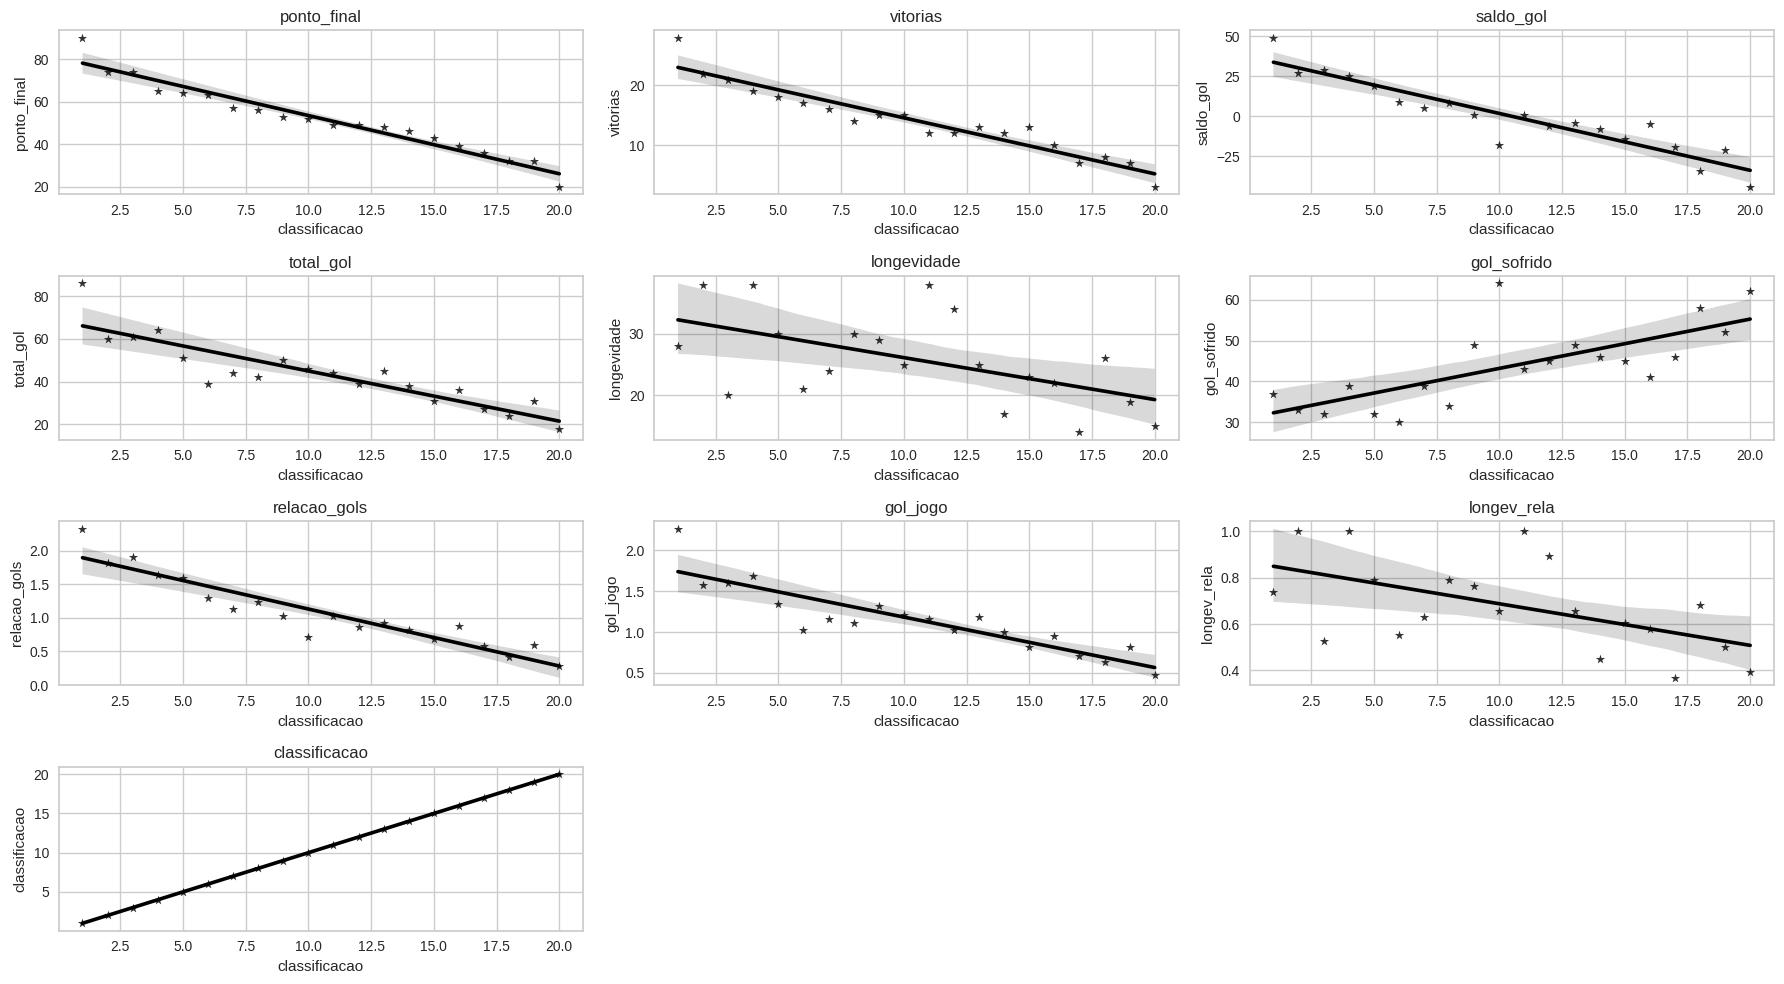

In [59]:
plt.figure(figsize=(18,10))
for i , num in enumerate(num_col):
    ax=plt.subplot(4, 3, i+1)
    sns.regplot(data=df_final, y=num, x="classificacao", fit_reg=True,color="black", marker="*")
    plt.title(num)
    plt.tight_layout()

In [60]:
df_cluster=df_final.drop(columns=["time", "classificacao"])

<Axes: >

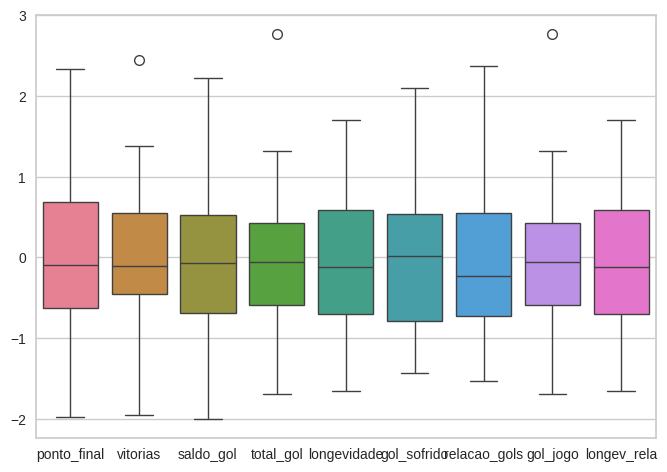

In [61]:
sns.boxplot(df_cluster.apply(scale))

In [62]:
df_scale=df_cluster.apply(scale)

In [63]:
x=df_scale

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

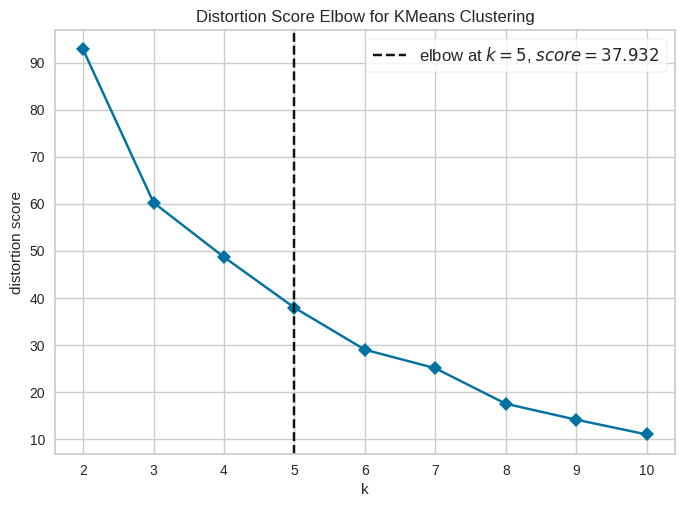

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [64]:
kelbow_visualizer(KMeans(), x, k=10, timings=False)

In [65]:
model=KMeans(n_clusters=4)
model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


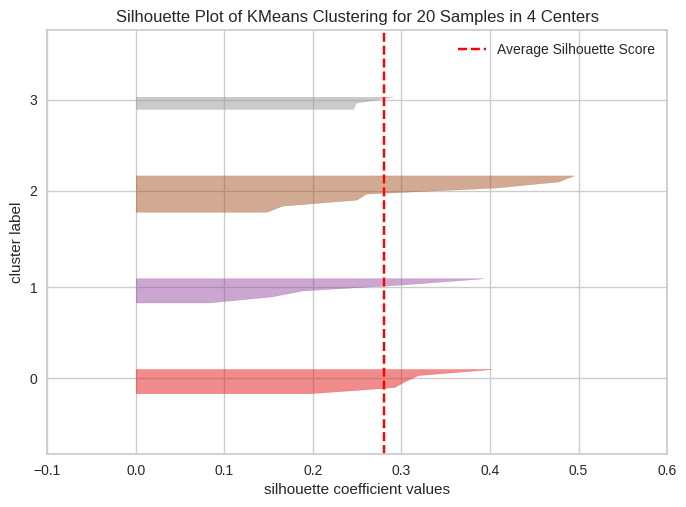

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 20 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [66]:
silhouette_visualizer(model, x)

In [67]:
labels=model.labels_
centers= pd.DataFrame(model.cluster_centers_, columns=df_cluster.columns)
centers

,ponto_final,vitorias,saldo_gol,total_gol,longevidade,gol_sofrido,relacao_gols,gol_jogo,longev_rela
0,-0.116851,-0.122807,-0.236315,0.065546,0.613960,0.643395,-0.343700,0.065546,0.613960
1,0.658054,0.543860,0.636232,0.235965,-0.111629,-1.079242,0.659538,0.235965,-0.111629
2,-1.025298,-0.969925,-0.941364,-0.951353,-0.889046,0.643395,-0.915153,-0.951353,-0.889046
3,1.490358,1.561404,1.529987,1.717304,1.237223,-0.774841,1.608959,1.717304,1.237223


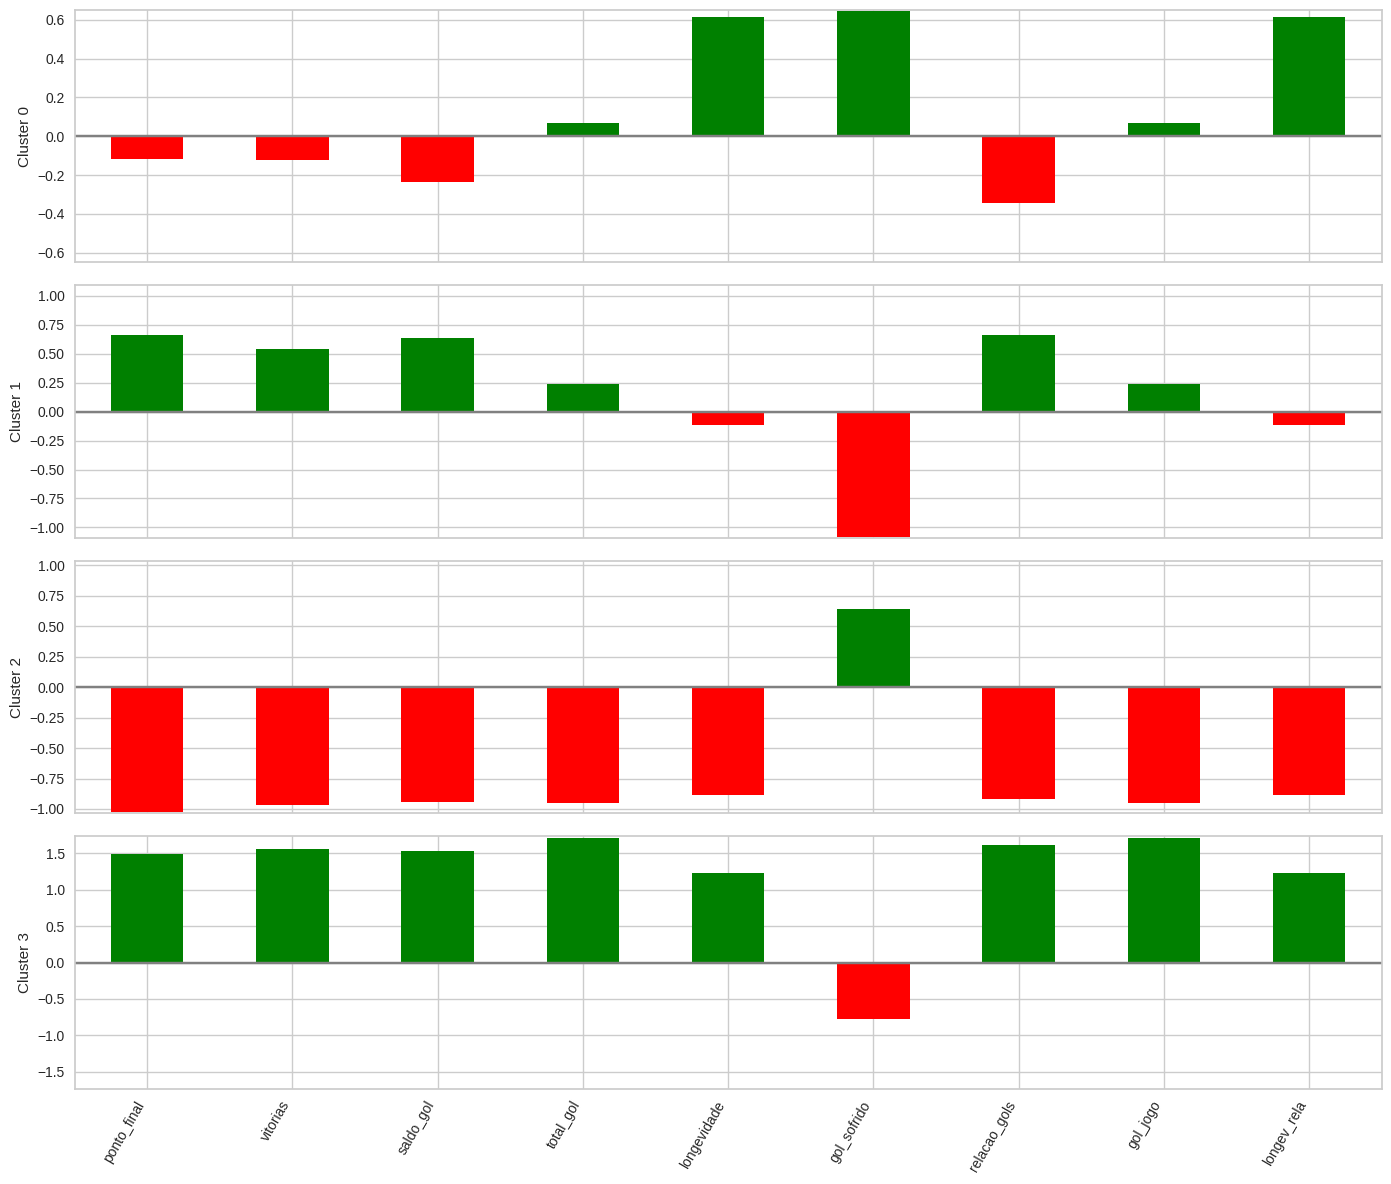

In [68]:
#plotando as caracteristicas dos noss clusters

fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [69]:
labels=pd.DataFrame(labels)

In [70]:
df_final=pd.merge(df_final, labels, how="left", left_index=True, right_index=True)

In [71]:
df_final.loc[df_final[0]==0]

,time,ponto_final,vitorias,saldo_gol,total_gol,longevidade,gol_sofrido,relacao_gols,gol_jogo,longev_rela,classificacao,0
8,Fortaleza,53,15,1,50,29,49,1.020408,1.315789,0.763158,9,0
9,Goiás,52,15,-18,46,25,64,0.718750,1.210526,0.657895,10,0
10,Bahia,49,12,1,44,38,43,1.023256,1.157895,1.000000,11,0
11,Vasco da Gama,49,12,-6,39,34,45,0.866667,1.026316,0.894737,12,0
12,Atlético-MG,48,13,-4,45,25,49,0.918367,1.184211,0.657895,13,0
